In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts

In [2]:
plt.style.use("ggplot")

In [3]:
boston=datasets.load_boston()

In [4]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y=boston.target
X=df.values

In [6]:
X_room=X[:,5].reshape(-1,1)
y=y.reshape(-1,1)

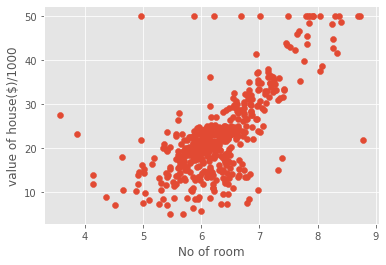

In [7]:
plt.scatter(X_room,y)
plt.xlabel("No of room")
plt.ylabel("value of house($)/1000")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error as mse

In [9]:
reg=LinearRegression()

In [48]:
X_train,X_test,y_train,y_test=tts(X_room,y,test_size=.3,random_state=42)

In [49]:
reg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
prediction_space = np.linspace(min(X_room),max(X_room)).reshape(-1, 1)


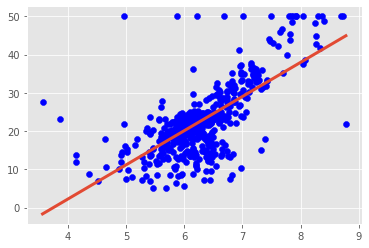

In [51]:
plt.scatter(X_room, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), linewidth=3)
plt.show()

In [14]:
reg.score(X_test,y_test),r2_score(y_test,reg.predict(X_test))   ### both are same

(0.4584649934303068, 0.4584649934303068)

In [15]:
np.sqrt(mse(y_test,reg.predict(X_test)))

6.352279094771659

In [16]:
mat=df.corr().abs()
upper = mat.where(np.triu(np.ones(mat.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [17]:
to_drop

[]

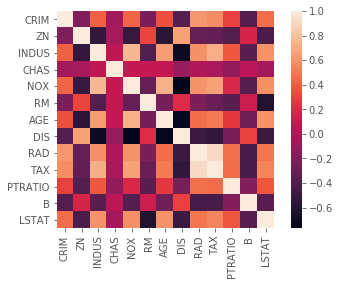

In [18]:
sns.heatmap(df.corr(),square=True)

### using all column or feature


In [19]:
X_train,X_test,y_train,y_test=tts(X,y,random_state=42,test_size=.3)

In [20]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
reg.score(X_test,y_test)

0.711226005748496

In [22]:
np.sqrt(mse(y_test,reg.predict(X_test)))

4.638689926172797

### useing cross-validation


In [23]:
reg=LinearRegression()


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cv_result=cross_val_score(reg,X,y,cv=5)

In [26]:
cv_result

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [27]:
np.mean(cv_result)

0.3532759243958772

### using Ridge and lasso regression


In [28]:
from sklearn.linear_model import Ridge

In [29]:
X_train,X_test,y_train,y_test=tts(X,y,random_state=42,test_size=.3)

In [30]:
reg=Ridge(alpha=.1,normalize=True)
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.6996938275127313

In [31]:
from sklearn.linear_model import Lasso
X_train,X_test,y_train,y_test=tts(X,y,random_state=42,test_size=.3)

In [32]:
reg=Lasso(alpha=.1,normalize=True)
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.5950229535328551

### lasso can be use for feature selection


In [33]:
names=df.columns

In [34]:
reg=Lasso(alpha=.1)
lasso_cef=reg.fit(X,y).coef_

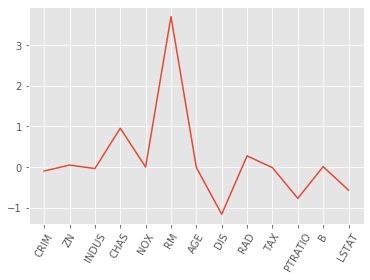

In [35]:
plt.plot(range(len(names)),lasso_cef)
plt.xticks(range(len(names)),names,rotation=60)
plt.show()

### Understanding important of alpha in regularization


In [36]:
### always use Ridge over lasso for regression (lasso is good for feature selection)

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
ridge=Ridge(normalize=True)
alpha_space = np.logspace(-4, 0, 50)
ridge_acc=[]
alpha_list=[]
ridge_std=[]
for alpha in alpha_space:
    ridge.alpha=alpha
    cv_score=cross_val_score(ridge,X,y,cv=10)
    ridge_acc.append(np.mean(cv_score))
    ridge_std.append(np.std(cv_score))
    alpha_list.append(alpha)


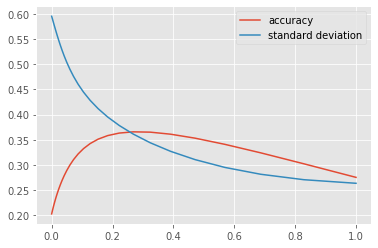

In [38]:
plt.plot(alpha_list,ridge_acc,label="accuracy")
plt.plot(alpha_list,ridge_std,label="standard deviation")
plt.legend()
plt.show()

In [ ]:
prediction_space = np.linspace(min(X_room),max(X_room)).reshape(-1, 1)


In [41]:
y.shape

(506, 1)

In [44]:
np.logspace(-4, 0, 10)

array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00])

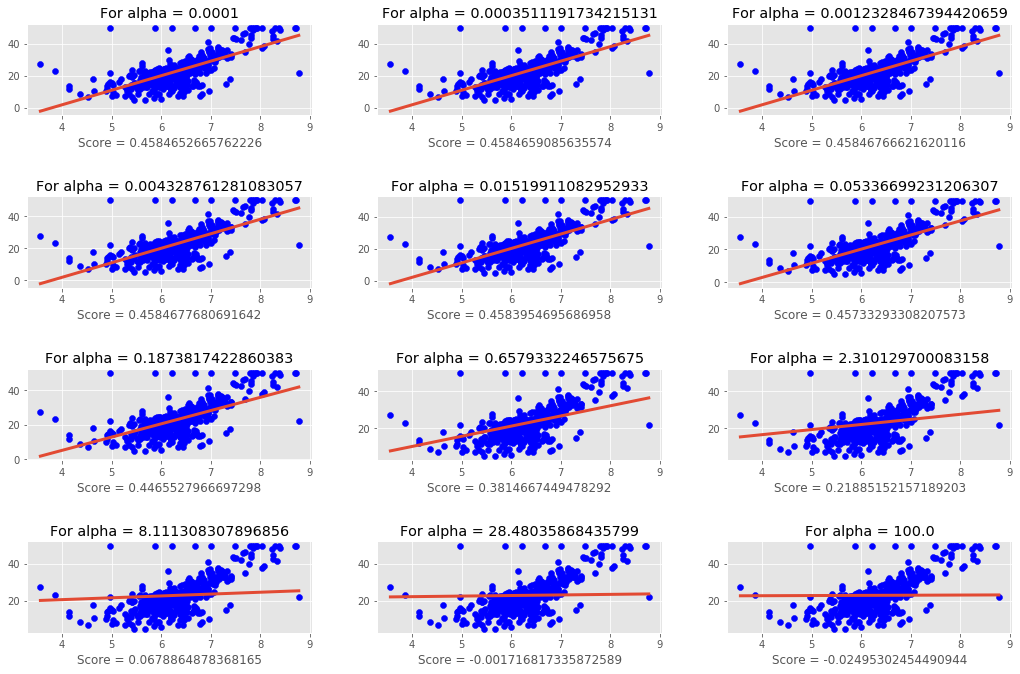

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
ridge=Ridge(normalize=True)
alpha_space = np.logspace(-4,2, 12)
ridge_acc=[]
alpha_list=[]
ridge_std=[]
i=1;
plt.figure(figsize=(15,10))
for alpha in alpha_space:
    ridge.alpha=alpha
    X_train,X_test,y_train,y_test=tts(X_room,y,test_size=.3,random_state=42)
    ridge.fit(X_train,y_train)
    plt.subplot(4,3,i)
    plt.title("For alpha = {}".format(alpha))
    plt.xlabel("Score = {}".format(ridge.score(X_test,y_test)))
    plt.scatter(X_room, y, color='blue')
    plt.plot(prediction_space, ridge.predict(prediction_space), linewidth=3)
    i+=1

plt.tight_layout(pad=3.0)
plt.show()

In [70]:
np.logspace(-4,2, 12)

array([1.00000000e-04, 3.51119173e-04, 1.23284674e-03, 4.32876128e-03,
       1.51991108e-02, 5.33669923e-02, 1.87381742e-01, 6.57933225e-01,
       2.31012970e+00, 8.11130831e+00, 2.84803587e+01, 1.00000000e+02])

In [46]:
X_room.shape,y.shape

((506, 1), (506, 1))

In [ ]:
plt.subplot(4,3,1)
plt.scatter(X_room, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), linewidth=3)

plt.show()

In [ ]:
np.linspace(0.0001,)